# **Track Popularity Prediction**

## **1.IMPORT LIBRARIES**

In [1]:
!pip install pandas pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install magic

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement magic (from versions: none)
ERROR: No matching distribution found for magic


In [3]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance


In [4]:
import pyarrow.parquet as pq

file_path_1 = r"D:\GUVI\Shahanaz_Final_Project\datafile1.parquet"  # Path to the parquet file containing the data
table_1 = pq.read_table(file_path_1)  # Read the parquet file into a PyArrow Table object
df_parquet = table_1.to_pandas()  # Convert the PyArrow Table into a pandas DataFrame for easier manipulation

# Display the first few rows of the dataframe
df_parquet.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
print(type(df_parquet))
print(df_parquet.columns)
print(df_parquet.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
(114000, 21)


In [6]:
# Define the path where the Excel file will be saved
csv_file_path = 'D:\\GUVI\\Shahanaz_Final_Project\\Data.csv'

# Save the DataFrame to an Excel file
df_parquet.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")


DataFrame saved to D:\GUVI\Shahanaz_Final_Project\Data.csv


## **2.DATA EXPLORATION**

In [7]:
file_path = 'D:\GUVI\Shahanaz_Final_Project\Data.csv'
audio_df = pd.read_csv(file_path)
print(audio_df.shape)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\shaha\AppData\Local\Temp\ipykernel_18356\3067983755.py:1: SyntaxWarning: invalid escape sequence '\G'
  file_path = 'D:\GUVI\Shahanaz_Final_Project\Data.csv'


(114000, 21)


In [8]:
audio_df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [9]:
audio_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
audio_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
#Remove the NaN values from the dataset
audio_df.isnull().sum()
audio_df.dropna(how='any',inplace=True)
audio_df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [12]:
audio_df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [13]:
audio_df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

## **3.DATA DISTRIBUTION**

**1) Numerical columns**

In [14]:
numerical_cols = audio_df[audio_df.columns[(audio_df.dtypes == 'float64') | (audio_df.dtypes == 'int64')]]
numerical_cols.shape

(113999, 15)

In [15]:
numerical_cols.sample(5)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
34210,34210,73,149880,0.513,0.396,7,-13.061,1,0.0299,0.251,0.177000,0.110,0.229,140.208,4
2308,2308,71,250900,0.542,0.433,9,-10.470,1,0.0305,0.897,0.173000,0.101,0.495,140.939,4
83910,83910,49,166413,0.593,0.877,0,-3.825,0,0.0677,0.123,0.000000,0.503,0.635,123.760,4
3342,3342,1,171978,0.706,0.525,4,-8.879,0,0.0298,0.682,0.000093,0.175,0.730,89.945,4
89308,89308,1,211920,0.787,0.858,10,-4.152,0,0.0373,0.405,0.000003,0.133,0.814,105.000,4


In [16]:
dist_numerical_cols = numerical_cols.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = numerical_cols.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (numerical_cols.isnull().mean() * 100).round(2)
# The number of -1 values in the 'key' column
dist_numerical_cols.loc['key', 'Missing Values'] = (audio_df['key'] == -1).sum()
dist_numerical_cols

,min,max,Missing Values,Missing Percentage
Unnamed: 0,0.000,113999.000,0,0.0
popularity,0.000,100.000,0,0.0
duration_ms,8586.000,5237295.000,0,0.0
danceability,0.000,0.985,0,0.0
energy,0.000,1.000,0,0.0
key,0.000,11.000,0,0.0
loudness,-49.531,4.532,0,0.0
mode,0.000,1.000,0,0.0
speechiness,0.000,0.965,0,0.0
acousticness,0.000,0.996,0,0.0


**2) Categorical columns**


In [17]:
categorical_cols = audio_df[audio_df.columns[(audio_df.dtypes == 'object') | (audio_df.dtypes == 'bool')]]
categorical_cols.shape

(113999, 6)

In [18]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
3275,7gu4nfoJkzmRsATBRjNCWI,Marilyn Manson,Twisted Halloween Hits,WE ARE CHAOS,True,alternative
1582,62UAojbZVLY5VpkV3jHJHK,Jackie Mittoo,Studio One Soul,Deeper and Deeper,False,afrobeat
80674,2kRzgmBlmhvFvCEgMHltWz,Shreya Ghoshal,Aashiqui 2,Sunn Raha Hai (Female),False,pop-film
46046,61Afq5IXaqMSuFhvVinYbM,De Doelleazen,Skijt Oan De Rest,Skijt Oan De Rest,False,happy
98693,5TcuM4sQFHK747kwB2q1Qy,Annaleigh Ashford,Sunday in the Park with George (2017 Broadway ...,Everybody Loves Louis,False,show-tunes


In [19]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
track_id,0,0.0
artists,0,0.0
album_name,0,0.0
track_name,0,0.0
explicit,0,0.0
track_genre,0,0.0


In [20]:
audio_df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113999,113999,113999,113999,113999,113999
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104252,1000


## **4.DATA VISUALIZATION**

<Axes: xlabel='track_genre', ylabel='count'>

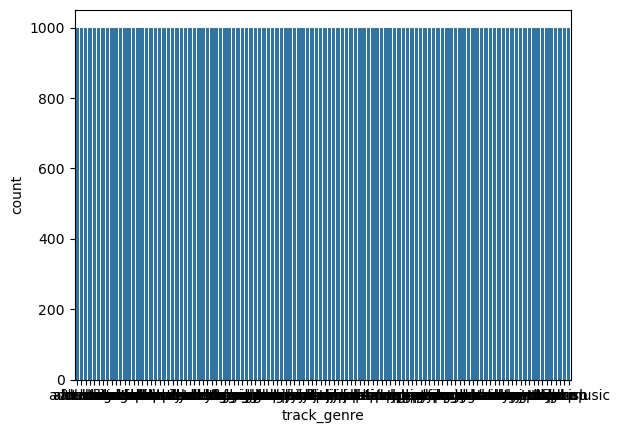

In [21]:
sns.countplot(x = 'track_genre', data = audio_df)  # Data is imbalanced

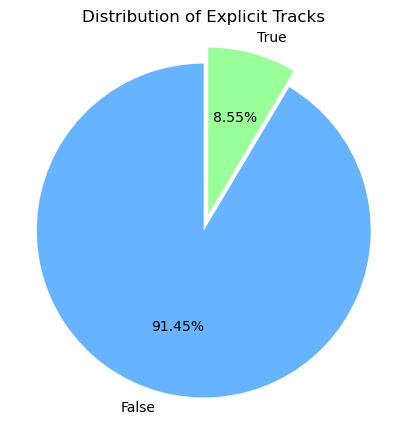

In [22]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

# Explode the slice with explicit tracks for emphasis
explode = [0, 0.1]  # Only "yes" (true) will be slightly exploded
colors = ['#66b3ff','#99ff99']

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

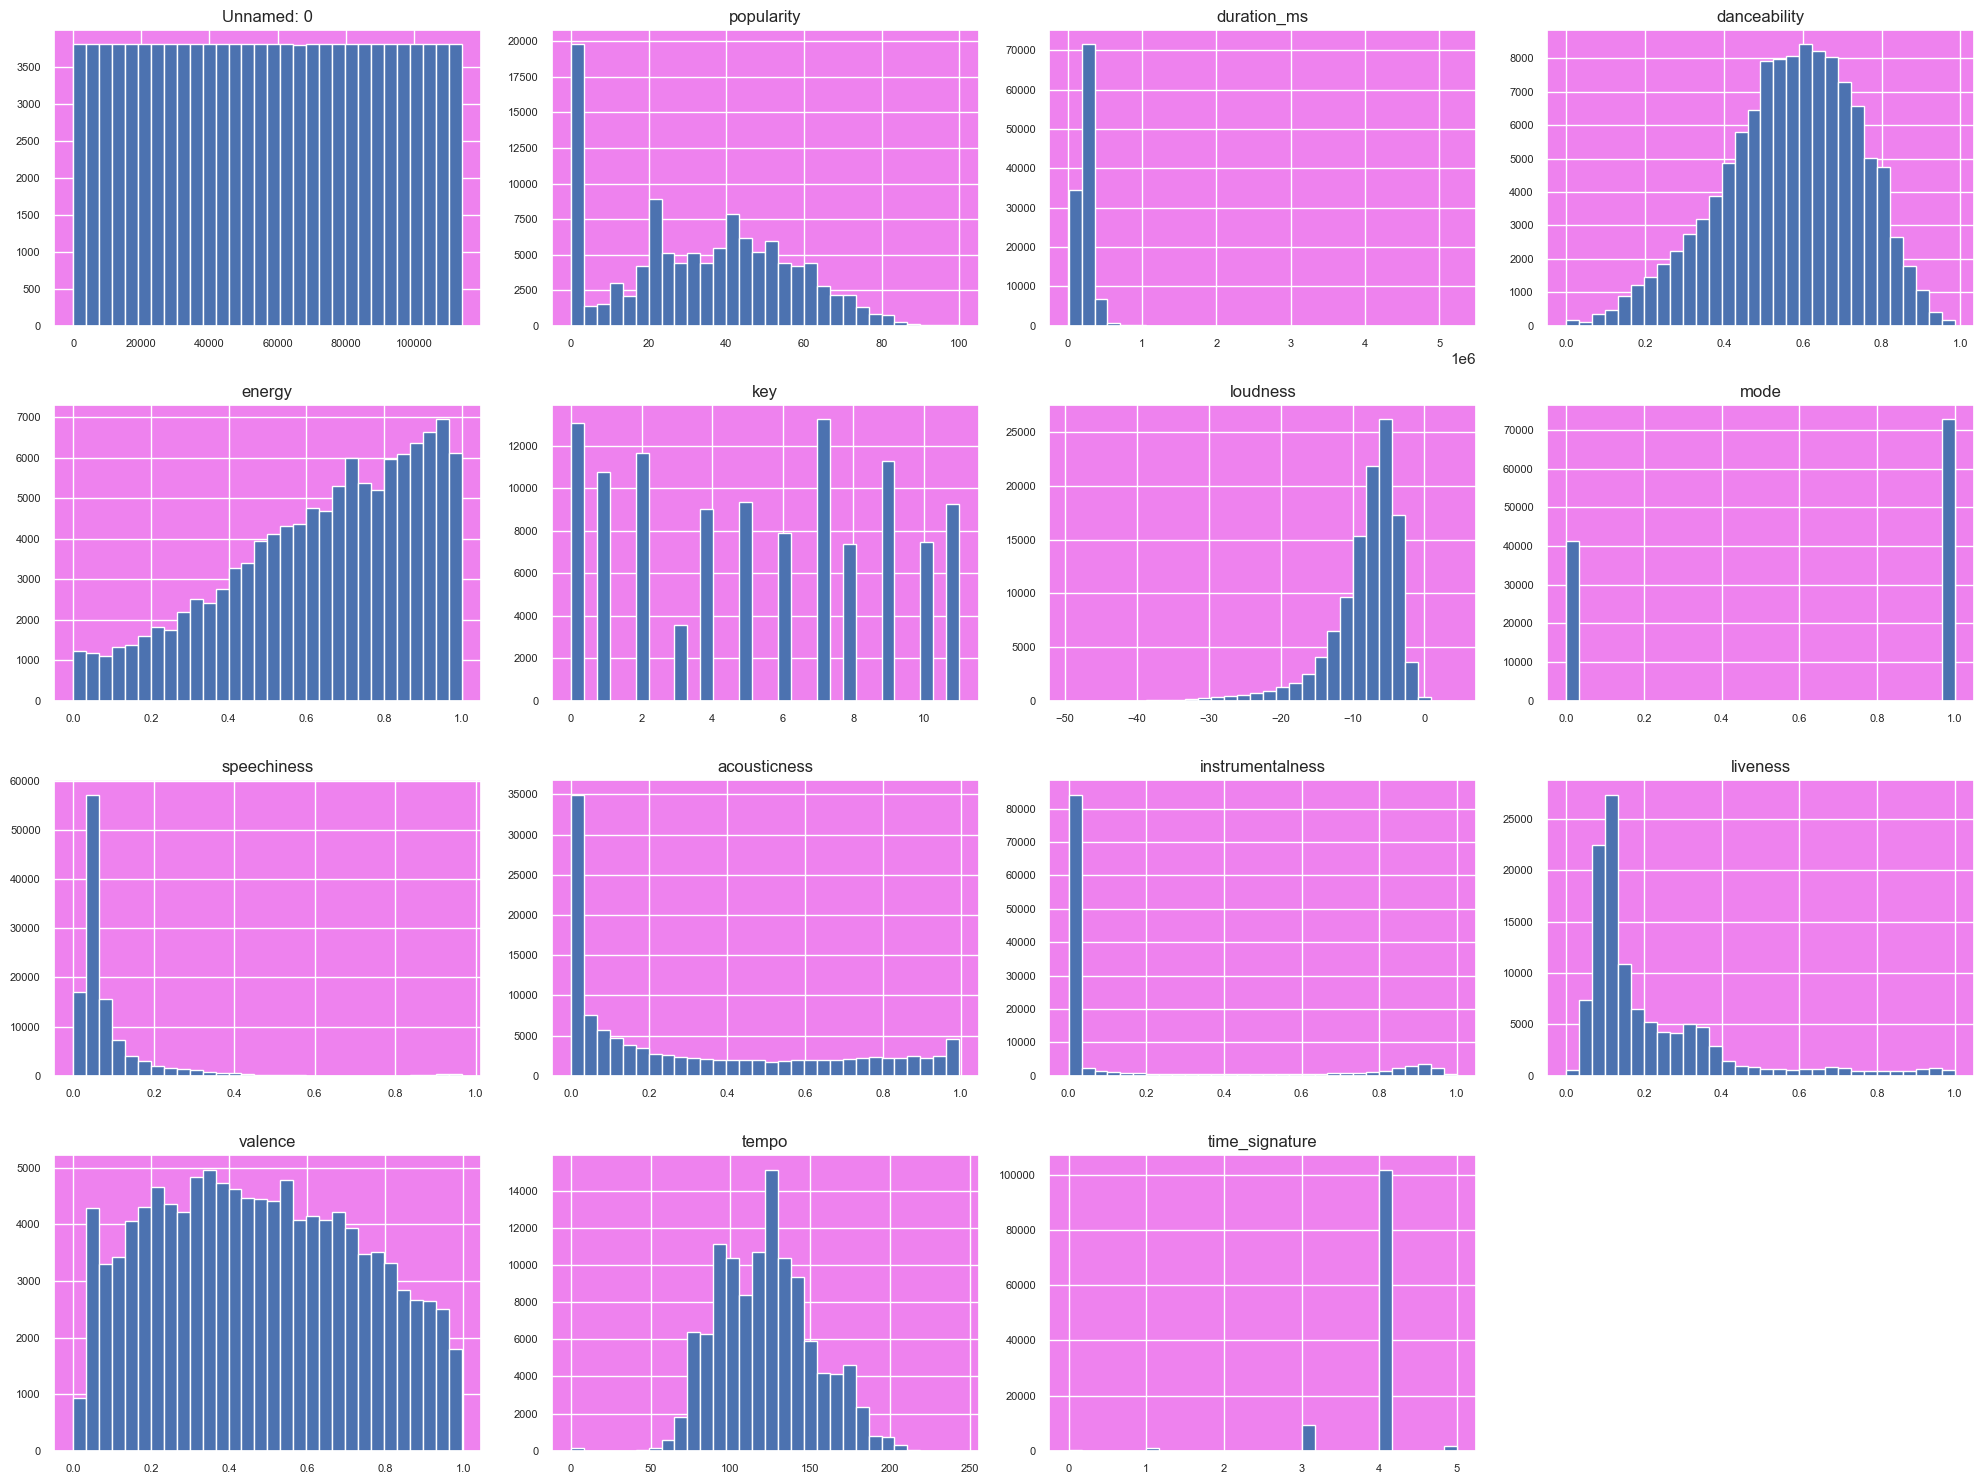

'graphical skewing visualizations of data'

In [23]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#EE82EE","figure.facecolor":"#FFFFFF"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

'''graphical skewing visualizations of data'''

## **5.DATA MODELLING**

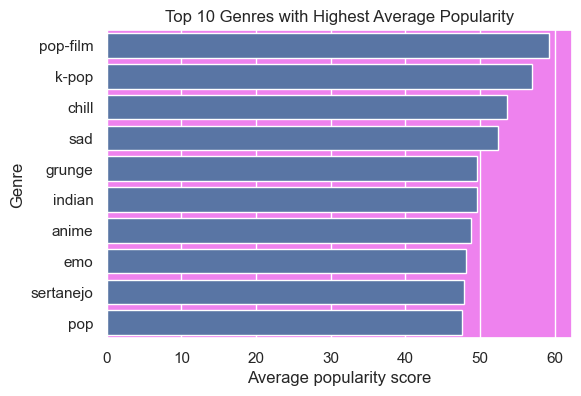

In [24]:
# Calculate the average popularity score for each genre
avg_popularity_by_genre = audio_df.groupby('track_genre')['popularity'].mean().reset_index()

# Get the top 10 genres based on the highest average popularity
top10_popular_genres = avg_popularity_by_genre.nlargest(10, 'popularity')

# Create a figure for the plot with a specific size
plt.figure(figsize=(6, 4))

# Plot a bar chart showing the top 10 genres with the highest average popularity
sns.barplot(x='popularity', y='track_genre', data=top10_popular_genres)

# Set the title and labels for the plot
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Average popularity score')
plt.ylabel('Genre')

# Display the plot
plt.show()


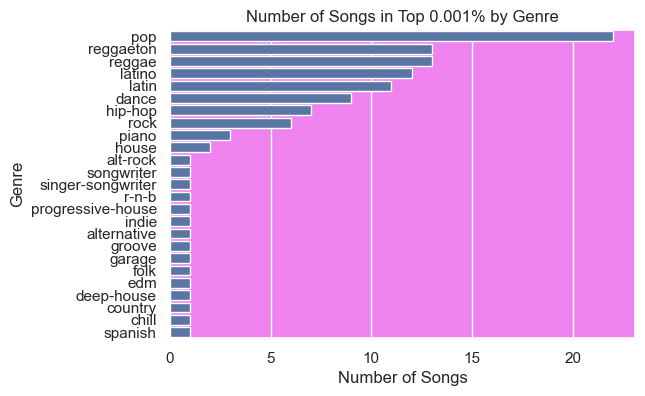

The genre with the most songs in the top 0.001% is pop with 22 songs.


In [25]:
df_sorted = audio_df.sort_values(by='popularity', ascending=False)

top_10_percent = df_sorted.head(int(0.001 * len(df_sorted)))

top_genres_count = top_10_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

most_common_genre = top_genres_count.loc[top_genres_count['count'].idxmax()]

# Bước 5: Visualize Kết Quả
plt.figure(figsize=(6, 4))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 0.001% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

print(f"The genre with the most songs in the top 0.001% is {most_common_genre['track_genre']} with {most_common_genre['count']} songs.")

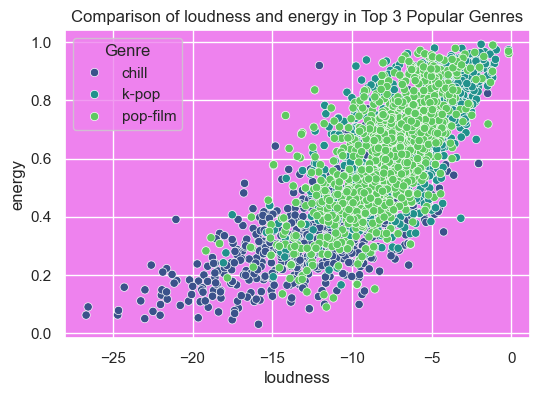

In [26]:
avg_popularity_by_genre = audio_df.groupby('track_genre')['popularity'].mean().reset_index()

top3_popular_genres = avg_popularity_by_genre.nlargest(3, 'popularity')

top3_genre_data = audio_df[audio_df['track_genre'].isin(top3_popular_genres['track_genre'])]

plt.figure(figsize=(6, 4))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top3_genre_data, palette='viridis')
plt.title('Comparison of loudness and energy in Top 3 Popular Genres')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.legend(title='Genre')
plt.show()

***Top genres: The most popular genres in the dataset by mean popularity of its songs***

***Top artists: The most popular artists in the dataset by mean popularity of their songs***

***Genres of top artists: The genres expressed in the songs of the top artists***

In [27]:
top_genres = audio_df.groupby('track_genre')['popularity'].mean()
top_genres = top_genres[top_genres >= 35].sort_values(ascending=False)
top_genres[:10]

track_genre
pop-film     59.283000
k-pop        56.952953
chill        53.651000
sad          52.379000
grunge       49.594000
indian       49.539000
anime        48.772000
emo          48.128000
sertanejo    47.866000
pop          47.576000
Name: popularity, dtype: float64

In [28]:
copy_df = audio_df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

In [29]:
top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists_list = top_artists.index.tolist()
top_artists[:10]

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64

In [30]:
# Convert all values in 'artists' to strings and apply .str.lower()
genres_artists = audio_df[audio_df['artists'].isin(top_artists_list)]['track_genre'].unique().tolist()

# Display the first 10 unique genres
print(genres_artists[:10])

['alt-rock', 'alternative', 'blues', 'british', 'cantopop', 'chill', 'country', 'dance', 'disco', 'edm']


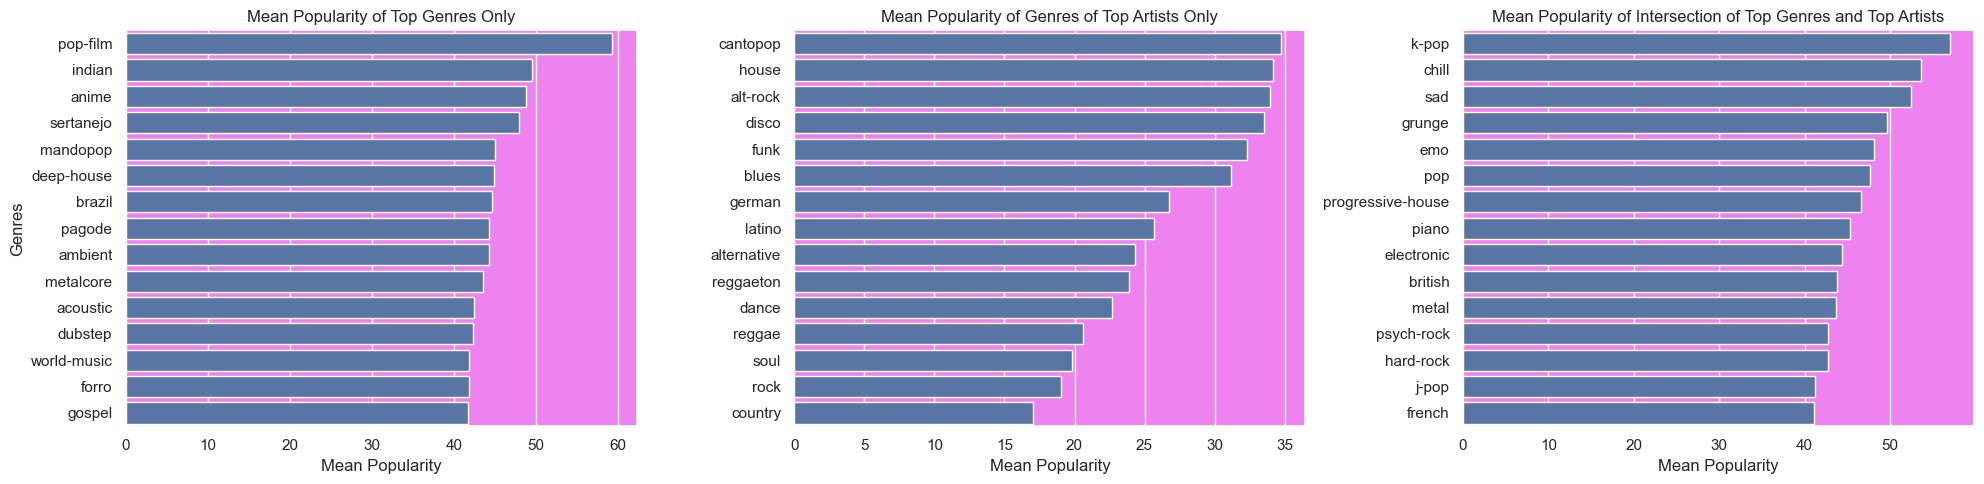

In [31]:
# Step 1: Convert `top_genres` and `genres_artists` to DataFrames
top_genres_df = top_genres.reset_index()
top_genres_df.columns = ['track_genre', 'Mean Popularity']

genres_artists_df = pd.DataFrame({'track_genre': genres_artists})

# Step 2: Find differences and intersection as lists
top_genres_only = list(set(top_genres_df['track_genre']) - set(genres_artists_df['track_genre']))
genres_artists_only = list(set(genres_artists_df['track_genre']) - set(top_genres_df['track_genre']))
intersection = list(set(top_genres_df['track_genre']) & set(genres_artists_df['track_genre']))

# Step 3: Filter and calculate the mean popularity for each set
top_genres_only_df = audio_df[audio_df['track_genre'].isin(top_genres_only)].groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).head(15)
top_genres_only_df.columns = ['Genres', 'Mean Popularity']

genres_artists_only_df = audio_df[audio_df['track_genre'].isin(genres_artists_only)].groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).head(15)
genres_artists_only_df.columns = ['Genres', 'Mean Popularity']

intersection_df = audio_df[audio_df['track_genre'].isin(intersection)].groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).head(15)
intersection_df.columns = ['Genres', 'Mean Popularity']

# Step 4: Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=top_genres_only_df['Mean Popularity'], y=top_genres_only_df['Genres'], ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=genres_artists_only_df['Mean Popularity'], y=genres_artists_only_df['Genres'], ax=axes[1])
axes[1].set_title('Mean Popularity of Genres of Top Artists Only')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=intersection_df['Mean Popularity'], y=intersection_df['Genres'], ax=axes[2])
axes[2].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


## **6.NORMALIZATION**

In [32]:
data = audio_df
data['popularity_flag'] = 0
data.loc[audio_df['popularity'] > 50, 'popularity_flag'] = 1

In [33]:
data.shape

(113999, 22)

In [34]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [35]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'popularity_flag'],
      dtype='object')

In [36]:
data_art = data.groupby(['artists']).size()
data_art = data_art.to_frame()
data_art.sort_values(by=[0], ascending=False)

,0
artists,
The Beatles,279
George Jones,271
Stevie Wonder,236
Linkin Park,224
Ella Fitzgerald,222
...,...
Mother Love Bone,1
DubVision;Afrojack,1
Dub Pistols;Too Many T's,1


In [37]:
data_gen = data.groupby(['track_genre']).size()
data_gen = data_gen.to_frame()
data_gen.sort_values(by=[0], ascending=False)

,0
track_genre,
acoustic,1000
afrobeat,1000
psych-rock,1000
progressive-house,1000
power-pop,1000
...,...
emo,1000
electronic,1000
electro,1000


In [38]:
data2 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name','popularity'], axis=1)

In [39]:
data2.shape

(113999, 16)

In [40]:
data2.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [41]:
data2.dtypes

duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
popularity_flag       int64
dtype: object

In [42]:
# Select only numeric columns for correlation
numeric_data = data2.select_dtypes(include=[float, int])

# Calculate the correlation with 'popularity_flag'
pop_corr = numeric_data.corr()['popularity_flag'][:-1]

print(pop_corr)

duration_ms        -0.040975
danceability        0.052040
energy             -0.022273
key                -0.001432
loudness            0.034286
mode               -0.026229
speechiness        -0.049383
acousticness       -0.035401
instrumentalness   -0.081801
liveness           -0.086908
valence            -0.040239
tempo              -0.013158
time_signature      0.024892
Name: popularity_flag, dtype: float64


In [43]:
ts_list = pop_corr.values.tolist()
ts_list_abs =  [abs(ele) for ele in ts_list]

def Average(lst):
    return sum(lst) / len(lst)

average = Average(ts_list_abs)
average

0.039155028065120834

In [44]:
pop_corr_df = pop_corr.to_frame()
pop_corr_df

,popularity_flag
duration_ms,-0.040975
danceability,0.052040
energy,-0.022273
key,-0.001432
loudness,0.034286
mode,-0.026229
speechiness,-0.049383
acousticness,-0.035401
instrumentalness,-0.081801
liveness,-0.086908


In [45]:
pop_corr_df['pop_flag_abs'] = abs(pop_corr_df['popularity_flag'])
pop_corr_abv = pop_corr_df[(pop_corr_df['pop_flag_abs']>average)]
pop_corr_abv = pop_corr_abv.sort_values(by=['pop_flag_abs'], ascending=False)
pop_corr_abv

,popularity_flag,pop_flag_abs
liveness,-0.086908,0.086908
instrumentalness,-0.081801,0.081801
danceability,0.052040,0.052040
speechiness,-0.049383,0.049383
duration_ms,-0.040975,0.040975
valence,-0.040239,0.040239


# Encode

In [46]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import joblib

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

dummies_var = ["explicit","track_genre"]

# Fit and transform the specified columns (e.g., `dummies_var`)
transformed_data = encoder.fit_transform(data2[dummies_var])

# Create a DataFrame with transformed columns and add it back to original data
transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(dummies_var))
data3_transformed = pd.concat([data2.drop(columns=dummies_var).reset_index(drop=True), transformed_df], axis=1)

# Save the encoder for future use
joblib.dump(encoder, 'onehot_encoder.joblib')

['onehot_encoder.joblib']

In [47]:
data3_transformed.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data2_test = data2.head(30)

In [49]:
# Load the encoder
encoder = joblib.load(r"D:\GUVI\Shahanaz_Final_Project\onehot_encoder.joblib")

# Transform the selected columns of test data
transformed_test_data = encoder.transform(data2_test[dummies_var])

# Create a DataFrame for transformed test data
transformed_test_df = pd.DataFrame(transformed_test_data, columns=encoder.get_feature_names_out(dummies_var))

# Concatenate the transformed test columns with the rest of the test DataFrame
test_data_encoded = pd.concat([data2_test.drop(columns=dummies_var).reset_index(drop=True), transformed_test_df], axis=1)


In [50]:
test_data_encoded.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


## **7.PREDICTION MODEL**

In [51]:
# Putting feature variable to X
X = data3_transformed.drop(['popularity_flag'],axis=1)

# Putting response variable to y
y = data3_transformed['popularity_flag']

### **XGBOOST CLASSIFIER ALGORITHM**

In [52]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [53]:
# Importing the XGBoost library and its classifier class
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Initializing an XGBoost classifier model with 1000 trees (estimators) and a random seed for reproducibility
xgb_model = XGBClassifier(n_estimators=1000, seed=123)

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y_train)

66493    0
94931    0
56855    0
20269    0
31320    0
        ..
317      0
50119    0
8868     1
77855    0
16046    0
Name: popularity_flag, Length: 85499, dtype: int64


In [54]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

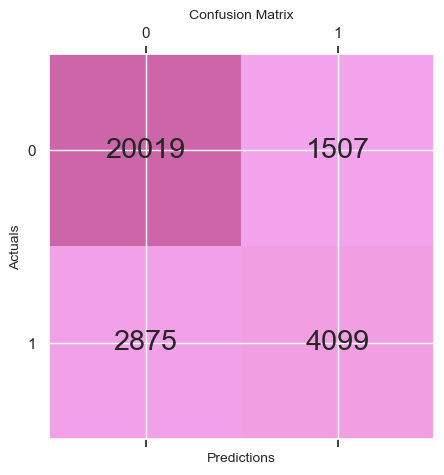

In [55]:
# Predicting target values for the training and test sets using the XGBoost model
y_train_predxgb = xgb_model.predict(X_train)
y_test_predxgb = xgb_model.predict(X_test)

# Compute the confusion matrix for the test set predictions
conf_matrix_xgb = confusion_matrix(y_true=y_test, y_pred=y_test_predxgb)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))  # Create a figure with specified size
ax.matshow(conf_matrix_xgb, cmap=plt.cm.Oranges, alpha=0.3)  # Display the confusion matrix with a color gradient

# Annotate the confusion matrix with actual values
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_xgb[i, j], va='center', ha='center', size='xx-large')

# Set the labels for axes and the plot title
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

# Display the plot
plt.show()

In [56]:
print("Accuracy: ", (conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,1]+conf_matrix_xgb[0,1]+conf_matrix_xgb[1,0]) )
print("Precision: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[0,1]) )
print("Recall: ", (conf_matrix_xgb[0,0])/(conf_matrix_xgb[0,0]+conf_matrix_xgb[1,0]) )

Accuracy:  0.8462456140350877
Precision:  0.9299916380191396
Recall:  0.8744212457412422


In [57]:
feature_names = xgb_model.get_booster().feature_names
print(feature_names)

['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit_True', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_

In [58]:
joblib.dump(xgb_model, 'xgboost_model.joblib')

['xgboost_model.joblib']

In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.125.70.239


In [ ]:
!ls


 datafile1.csv	     finalapp1.py   sample_data			 xgboostalgo_model.pkl
 datafile1.parquet   finalapp.py   'xgboostalgo_model (1).pkl'	 xgboost_model.pkl


In [ ]:
!streamlit run finalapp2.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.70.239:8501

your url is: https://four-sides-bake.loca.lt
2024-10-11 09:10:39.027 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/finalapp2.py", line 70, in <module>
    prediction = model.predict(input_data)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1565, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1186, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/